# Dimensionality Reduction

## Feature Selection

In [ ]:
#For binaryclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

vocal_channel_locs = sorted(y_train.unique())
vocal_channel_mapping = dict(zip(vocal_channel_locs, range(0, len(vocal_channel_locs) + 1)))

y_train_bin = y_train.map(vocal_channel_mapping).astype(int)
y_test_bin = y_test.map(vocal_channel_mapping).astype(int)

# lb = MyLabelBinarizer()
# y_train_bin = lb.fit_transform(y_train)
# y_test_bin = lb.fit_transform(y_test)
# n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
0       1
1       1
2       1
3       1
4       1
       ..
1823    1
1824    1
1825    1
1826    1
1827    1
Name: vocal_channel, Length: 1828, dtype: int64
(1828,)
(624, 425)
(624,)
0      1
1      1
2      1
3      1
4      1
      ..
619    0
620    0
621    0
622    0
623    0
Name: vocal_channel, Length: 624, dtype: int64
(624,)


In [ ]:
#For binaryclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

# vocal_channel_locs = sorted(y_train.unique())
# vocal_channel_mapping = dict(zip(vocal_channel_locs, range(0, len(vocal_channel_locs) + 1)))

# y_train_bin = y_train.map(vocal_channel_mapping).astype(int)
# y_test_bin = y_test.map(vocal_channel_mapping).astype(int)

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
(1828, 2)
(624, 425)
(624,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
(624, 2)


### Variance Threshold

In [ ]:
sel = VarianceThreshold(threshold = 0.20)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

X_train.shape, X_train_sel.shape, X_test_sel.shape

((1828, 425), (1828, 187), (624, 187))

In [ ]:
clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        song       0.80      0.73      0.76       264
      speech       0.81      0.86      0.84       360

    accuracy                           0.81       624
   macro avg       0.80      0.80      0.80       624
weighted avg       0.81      0.81      0.80       624



In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        song       0.84      0.91      0.87       264
      speech       0.93      0.87      0.90       360

    accuracy                           0.89       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.89      0.89      0.89       624



In [ ]:
# define min max scaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_sel)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test_sel)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print(classification_report(y_test_scale, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624



In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print(classification_report(y_test_scale, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       360
           1       0.84      0.87      0.85       264

   micro avg       0.87      0.87      0.87       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.87      0.87      0.87       624
 samples avg       0.87      0.87      0.87       624



### Univariate Feature Selection

In [ ]:
k = random.sample(range(1, 200), 20)

In [ ]:
type(k)

list

In [ ]:
k.sort()

In [ ]:
print(k)

[1, 10, 22, 32, 35, 63, 97, 106, 115, 122, 141, 142, 147, 163, 164, 169, 176, 184, 188, 196]


In [ ]:
acc = []
for x in range(1, 200):
    sel = SelectKBest(k = x)
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_test_sel = sel.transform(X_test)

    X_train_scale = scaler.fit_transform(X_train_sel)
    y_train_scale = scaler.fit_transform(y_train_bin)
    X_test_scale = scaler.fit_transform(X_test_sel)
    y_test_scale = scaler.fit_transform(y_test_bin)

    clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
    clf.fit(X_train_scale, y_train_scale)

    y_pred = clf.predict(X_test_scale)
    acc.append(metrics.accuracy_score(y_test_scale, y_pred))
    print (X_train_sel.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

(1828, 1)
Accuracy 0.8926282051282052
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       360
           1       0.85      0.97      0.90       264

   micro avg       0.91      0.89      0.90       624
   macro avg       0.91      0.90      0.90       624
weighted avg       0.92      0.89      0.90       624
 samples avg       0.89      0.89      0.89       624

(1828, 2)
Accuracy 0.8926282051282052
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       360
           1       0.85      0.97      0.90       264

   micro avg       0.91      0.89      0.90       624
   macro avg       0.91      0.90      0.90       624
weighted avg       0.92      0.89      0.90       624
 samples avg       0.89      0.89      0.89       624

(1828, 3)
Accuracy 0.8926282051282052
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       360
           1   

(1828, 23)
Accuracy 0.9391025641025641
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       360
           1       0.89      0.98      0.93       264

   micro avg       0.94      0.94      0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.95      0.94      0.94       624
 samples avg       0.94      0.94      0.94       624

(1828, 24)
Accuracy 0.9375
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       360
           1       0.89      0.98      0.93       264

   micro avg       0.94      0.94      0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.95      0.94      0.94       624
 samples avg       0.94      0.94      0.94       624

(1828, 25)
Accuracy 0.9342948717948718
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       360
           1       0.89 

(1828, 43)
Accuracy 0.9535256410256411
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.92      0.98      0.95       264

   micro avg       0.96      0.95      0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.95      0.96       624
 samples avg       0.95      0.95      0.95       624

(1828, 44)
Accuracy 0.9535256410256411
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.91      0.98      0.95       264

   micro avg       0.96      0.95      0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.96       624
 samples avg       0.95      0.95      0.95       624

(1828, 45)
Accuracy 0.9567307692307693
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       360
           1

(1828, 63)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.92      0.99      0.95       264

   micro avg       0.96      0.95      0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.95      0.96       624
 samples avg       0.95      0.95      0.95       624

(1828, 64)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.92      0.99      0.95       264

   micro avg       0.96      0.95      0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.95      0.96       624
 samples avg       0.95      0.95      0.95       624

(1828, 65)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1

(1828, 83)
Accuracy 0.9535256410256411
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.92      0.99      0.95       264

   micro avg       0.96      0.95      0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.95      0.96       624
 samples avg       0.95      0.95      0.95       624

(1828, 84)
Accuracy 0.9583333333333334
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       360
           1       0.92      0.99      0.95       264

   micro avg       0.96      0.96      0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624
 samples avg       0.96      0.96      0.96       624

(1828, 85)
Accuracy 0.9567307692307693
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1

(1828, 103)
Accuracy 0.9503205128205128
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.92      0.99      0.95       264

   micro avg       0.96      0.95      0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 104)
Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
           1       0.91      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 105)
Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
         

(1828, 123)
Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
           1       0.90      0.99      0.94       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 124)
Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
           1       0.90      0.99      0.94       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 125)
Accuracy 0.9487179487179487
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
         

(1828, 143)
Accuracy 0.9503205128205128
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 144)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 145)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
         

(1828, 163)
Accuracy 0.9439102564102564
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       360
           1       0.90      0.99      0.94       264

   micro avg       0.95      0.94      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.94      0.95       624
 samples avg       0.94      0.94      0.94       624

(1828, 164)
Accuracy 0.9455128205128205
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 165)
Accuracy 0.9455128205128205
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       360
         

(1828, 183)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 184)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.90      0.99      0.95       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624

(1828, 185)
Accuracy 0.9519230769230769
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
         

In [ ]:
print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

Maximum accuracy:- 0.9599358974358975 at Component = 80


Text(0, 0.5, 'Accuracy')

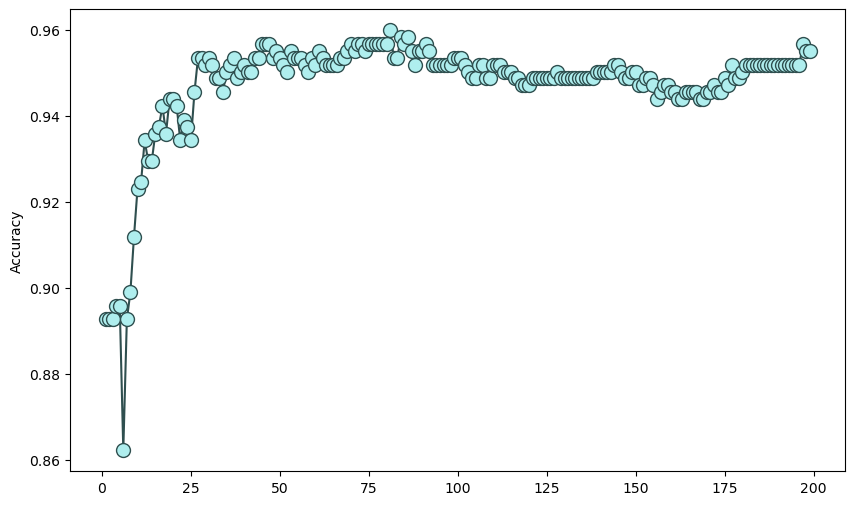

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,200),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
plt.ylabel('Accuracy')

### ANOVA test

In [ ]:
sel = SelectKBest(f_classif, k = 198)
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)

In [ ]:
cols_idxs = sel.get_support(indices=True)
selected_features = X_train.iloc[:,cols_idxs]

In [ ]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_sel)
y_train_scale = scaler.fit_transform(y_train)
X_test_scale = scaler.fit_transform(X_test_sel)
y_test_scale = scaler.fit_transform(y_test)

ValueError: ignored

In [ ]:
clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)
print (X_train_sel.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

(1828, 198)
Accuracy 0.9551282051282052
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.91      0.99      0.95       264

   micro avg       0.96      0.96      0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624
 samples avg       0.96      0.96      0.96       624



(None, None, None)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)
print (X_train_sel.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

(1828, 198)
Accuracy 0.8621794871794872
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       360
           1       0.86      0.81      0.83       264

   micro avg       0.86      0.86      0.86       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.86      0.86      0.86       624
 samples avg       0.86      0.86      0.86       624



(None, None, None)

### Select from Model

In [ ]:
sel = SelectFromModel(LogisticRegression())
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)

X_train_sel.shape, X_test_sel.shape

((1828, 78), (624, 78))

In [ ]:
X_train_scale = scaler.fit_transform(X_train_sel)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test_sel)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32)
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)
print (X_train_sel.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

(1828, 78)
Accuracy 0.907051282051282
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       360
           1       0.84      0.99      0.91       264

   micro avg       0.92      0.91      0.91       624
   macro avg       0.92      0.92      0.91       624
weighted avg       0.93      0.91      0.91       624
 samples avg       0.91      0.91      0.91       624



(None, None, None)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)
print (X_train_sel.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

(1828, 78)
Accuracy 0.875
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       360
           1       0.84      0.86      0.85       264

   micro avg       0.88      0.88      0.88       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.88      0.88      0.88       624
 samples avg       0.88      0.88      0.88       624



(None, None, None)

## Feature Projection

In [ ]:
#For binaryclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
(1828, 2)
(624, 425)
(624,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
(624, 2)


### PCA

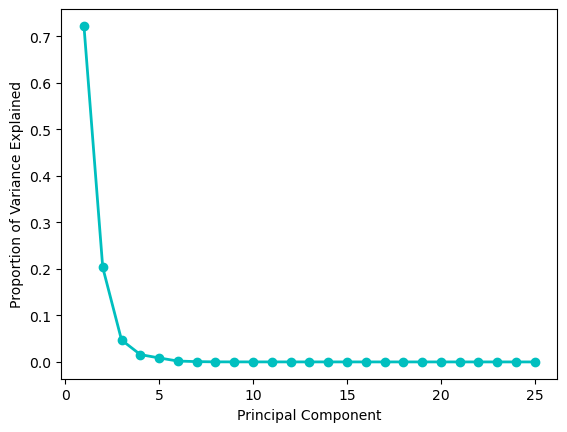

In [ ]:
# Cerchiamo valore ottimo di componenti
pca = PCA(n_components=25)
Principal_components=pca.fit_transform(X_train)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, c='c')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
y_train_bin = [i[0] for i in y_train_bin]
y_train_bin

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


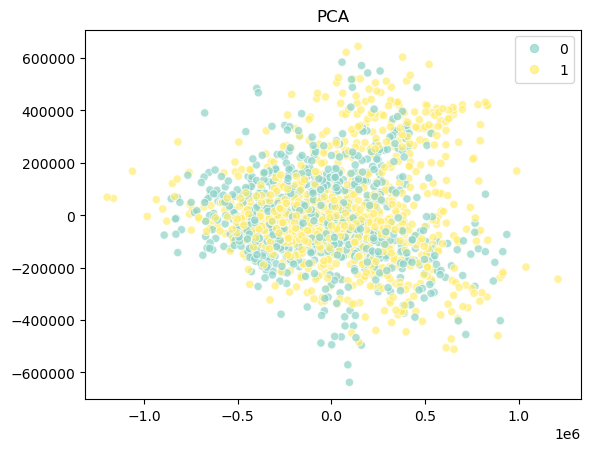

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

classes = ['0', '1']
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_bin, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

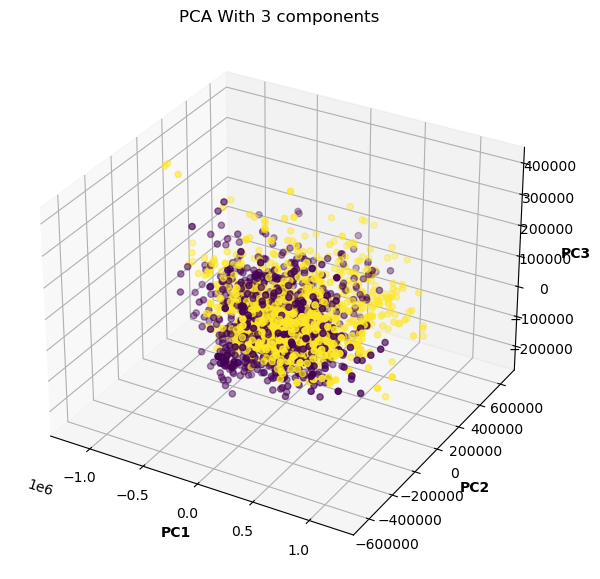

In [ ]:
pca = PCA(n_components=3)
X_train_pca3 = pca.fit_transform(X_train)
X_train_pca3.shape

x = X_train_pca3[:, 0]
y = X_train_pca3[:, 1]
z = X_train_pca3[:, 2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=y_train_bin)
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
plt.title("PCA With 3 components")
plt.show()

(1828, 1)
Accuracy 0.5400641025641025
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       360
           1       0.52      0.31      0.39       264

   micro avg       0.59      0.54      0.56       624
   macro avg       0.57      0.51      0.52       624
weighted avg       0.58      0.54      0.55       624
 samples avg       0.54      0.54      0.54       624

(1828, 2)
Accuracy 0.5608974358974359
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       360
           1       0.53      0.51      0.52       264

   micro avg       0.61      0.56      0.58       624
   macro avg       0.60      0.55      0.57       624
weighted avg       0.61      0.56      0.58       624
 samples avg       0.56      0.56      0.56       624

(1828, 3)
Accuracy 0.6009615384615384
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       360
           1   

(1828, 21)
Accuracy 0.7564102564102564
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       360
           1       0.66      1.00      0.79       264

   micro avg       0.78      0.76      0.77       624
   macro avg       0.83      0.79      0.76       624
weighted avg       0.86      0.76      0.76       624
 samples avg       0.76      0.76      0.76       624

(1828, 22)
Accuracy 0.7676282051282052
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       360
           1       0.68      0.99      0.81       264

   micro avg       0.79      0.77      0.78       624
   macro avg       0.84      0.80      0.78       624
weighted avg       0.86      0.77      0.77       624
 samples avg       0.77      0.77      0.77       624

(1828, 23)
Accuracy 0.7339743589743589
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       360
           1

(1828, 42)
Accuracy 0.7964743589743589
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       360
           1       0.70      0.98      0.82       264

   micro avg       0.82      0.80      0.81       624
   macro avg       0.84      0.82      0.81       624
weighted avg       0.87      0.80      0.80       624
 samples avg       0.80      0.80      0.80       624

(1828, 43)
Accuracy 0.7900641025641025
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       360
           1       0.70      0.98      0.82       264

   micro avg       0.81      0.79      0.80       624
   macro avg       0.84      0.82      0.80       624
weighted avg       0.86      0.79      0.80       624
 samples avg       0.79      0.79      0.79       624

(1828, 44)
Accuracy 0.7788461538461539
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       360
           1

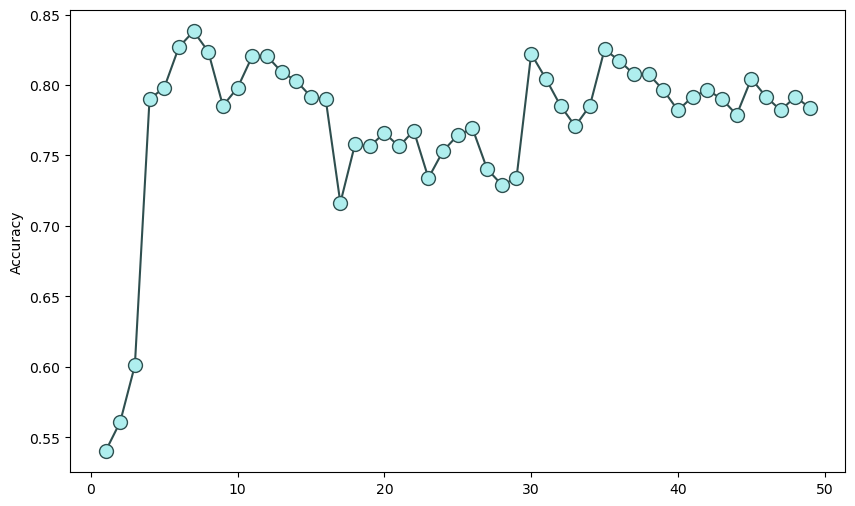

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        X_train_scale = scaler.fit_transform(X_train_pca)
        y_train_scale = scaler.fit_transform(y_train_bin)
        X_test_scale = scaler.fit_transform(X_test_pca)
        y_test_scale = scaler.fit_transform(y_test_bin)

        clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32).fit(X_train_scale,y_train_scale)
        y_pred = clf.predict(X_test_scale)
        acc.append(metrics.accuracy_score(y_test_scale, y_pred))
        print (X_train_pca.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8830128205128205
F1-score [0.86751361 0.89526542]
              precision    recall  f1-score   support

        song     0.8328    0.9053    0.8675       264
      speech     0.9258    0.8667    0.8953       360

    accuracy                         0.8830       624
   macro avg     0.8793    0.8860    0.8814       624
weighted avg     0.8864    0.8830    0.8835       624



### Gaussian Random Projection

In [ ]:
y_train_bin = [i[0] for i in y_train_bin]

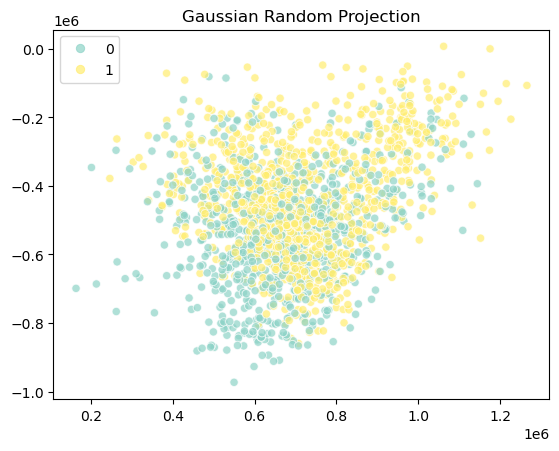

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)

classes = ['0', '1']
scatter = plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train_bin, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Gaussian Random Projection")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

(1828, 1)
Accuracy 0.5737179487179487
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       360
           1       0.57      0.39      0.46       264

   micro avg       0.62      0.57      0.60       624
   macro avg       0.60      0.55      0.57       624
weighted avg       0.61      0.57      0.58       624
 samples avg       0.57      0.57      0.57       624

(1828, 2)
Accuracy 0.5801282051282052
              precision    recall  f1-score   support

           0       0.60      0.87      0.71       360
           1       0.53      0.19      0.28       264

   micro avg       0.59      0.58      0.59       624
   macro avg       0.57      0.53      0.49       624
weighted avg       0.57      0.58      0.53       624
 samples avg       0.58      0.58      0.58       624

(1828, 3)
Accuracy 0.5785256410256411
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       360
           1   

(1828, 23)
Accuracy 0.8157051282051282
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       360
           1       0.81      0.80      0.80       264

   micro avg       0.84      0.82      0.83       624
   macro avg       0.83      0.81      0.82       624
weighted avg       0.84      0.82      0.83       624
 samples avg       0.82      0.82      0.82       624

(1828, 24)
Accuracy 0.719551282051282
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       360
           1       0.64      0.89      0.75       264

   micro avg       0.74      0.72      0.73       624
   macro avg       0.77      0.74      0.73       624
weighted avg       0.79      0.72      0.73       624
 samples avg       0.72      0.72      0.72       624

(1828, 25)
Accuracy 0.7243589743589743
              precision    recall  f1-score   support

           0       0.89      0.61      0.73       360
           1 

(1828, 43)
Accuracy 0.8573717948717948
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       360
           1       0.86      0.83      0.84       264

   micro avg       0.87      0.86      0.87       624
   macro avg       0.87      0.85      0.86       624
weighted avg       0.87      0.86      0.87       624
 samples avg       0.86      0.86      0.86       624

(1828, 44)
Accuracy 0.8525641025641025
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       360
           1       0.92      0.72      0.81       264

   micro avg       0.86      0.85      0.86       624
   macro avg       0.87      0.84      0.85       624
weighted avg       0.87      0.85      0.85       624
 samples avg       0.85      0.85      0.85       624

(1828, 45)
Accuracy 0.7884615384615384
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       360
           1

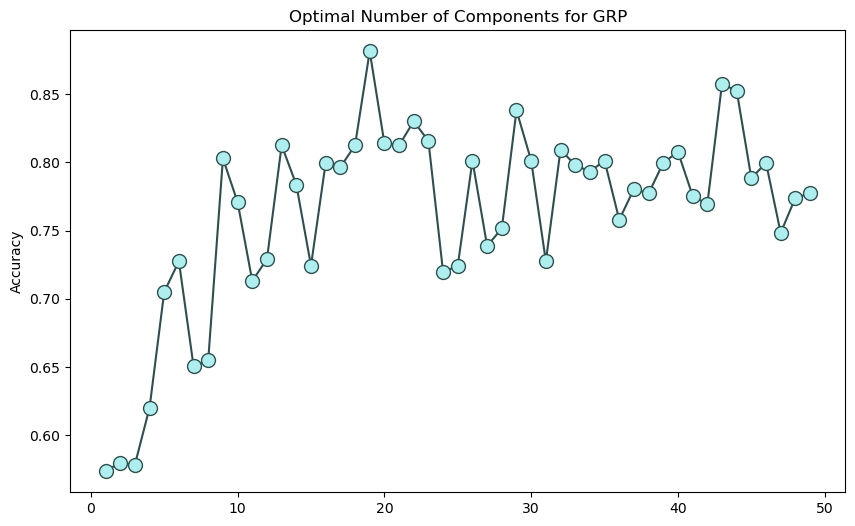

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        rsp = random_projection.GaussianRandomProjection(n_components=i)
        X_train_rsp = rsp.fit_transform(X_train)
        X_test_rsp = rsp.transform(X_test)

        X_train_scale = scaler.fit_transform(X_train_rsp)
        y_train_scale = scaler.fit_transform(y_train_bin)
        X_test_scale = scaler.fit_transform(X_test_rsp)
        y_test_scale = scaler.fit_transform(y_test_bin)

        clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32).fit(X_train_scale,y_train_scale)
        y_pred = clf.predict(X_test_scale)
        acc.append(metrics.accuracy_score(y_test_scale, y_pred))
        print (X_train_rsp.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.title('Optimal Number of Components for GRP')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=14)
X_train_rsp = rsp.fit_transform(X_train)
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(random_state=0).fit(X_train_rsp,y_train)
y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8060897435897436
F1-score [0.78809107 0.82127031]
              precision    recall  f1-score   support

        song       0.73      0.85      0.79       264
      speech       0.88      0.77      0.82       360

    accuracy                           0.81       624
   macro avg       0.80      0.81      0.80       624
weighted avg       0.82      0.81      0.81       624



### Multi Dimensional Scaling (MDS)

#### ISOMap

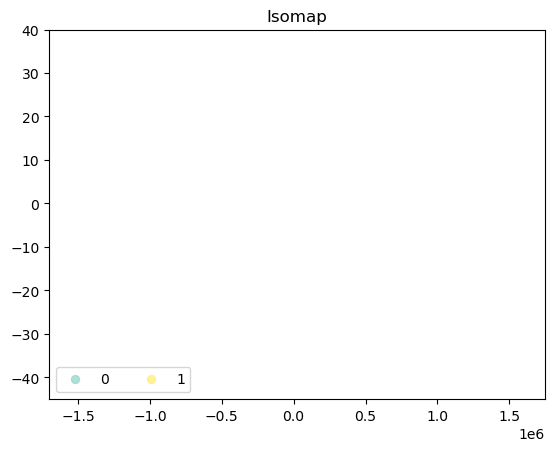

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)

classes = ['0', '1']
scatter = plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train_bin, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Isomap")
plt.ylim([-45, 40])
plt.legend(handles=scatter.legend_elements()[0], labels=classes, ncol=6, loc='lower left')
plt.savefig('FigXX-Isomap.png', dpi=600)

(1828, 1)
Accuracy 0.5721153846153846
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       360
           1       0.57      0.30      0.40       264

   micro avg       0.61      0.57      0.59       624
   macro avg       0.60      0.54      0.54       624
weighted avg       0.60      0.57      0.57       624
 samples avg       0.57      0.57      0.57       624

(1828, 2)
Accuracy 0.5769230769230769
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       360
           1       0.55      0.48      0.52       264

   micro avg       0.62      0.58      0.60       624
   macro avg       0.60      0.56      0.58       624
weighted avg       0.61      0.58      0.59       624
 samples avg       0.58      0.58      0.58       624

(1828, 3)
Accuracy 0.6282051282051282
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       360
           1   

(1828, 21)
Accuracy 0.7660256410256411
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       360
           1       0.76      0.69      0.72       264

   micro avg       0.79      0.77      0.78       624
   macro avg       0.78      0.76      0.77       624
weighted avg       0.79      0.77      0.78       624
 samples avg       0.77      0.77      0.77       624

(1828, 22)
Accuracy 0.7483974358974359
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       360
           1       0.75      0.65      0.70       264

   micro avg       0.77      0.75      0.76       624
   macro avg       0.76      0.74      0.75       624
weighted avg       0.77      0.75      0.76       624
 samples avg       0.75      0.75      0.75       624

(1828, 23)
Accuracy 0.7451923076923077
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       360
           1

(1828, 41)
Accuracy 0.7660256410256411
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       360
           1       0.81      0.65      0.72       264

   micro avg       0.80      0.77      0.78       624
   macro avg       0.80      0.75      0.77       624
weighted avg       0.80      0.77      0.78       624
 samples avg       0.77      0.77      0.77       624

(1828, 42)
Accuracy 0.7596153846153846
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       360
           1       0.79      0.63      0.70       264

   micro avg       0.78      0.76      0.77       624
   macro avg       0.79      0.74      0.76       624
weighted avg       0.78      0.76      0.77       624
 samples avg       0.76      0.76      0.76       624

(1828, 43)
Accuracy 0.7564102564102564
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       360
           1

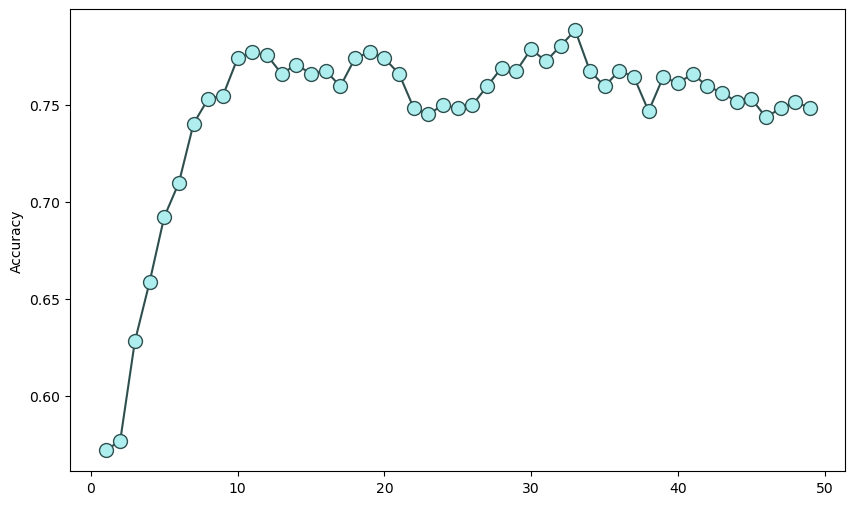

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        iso = Isomap(n_components=i)
        X_train_iso = iso.fit_transform(X_train)
        X_test_iso = iso.transform(X_test)

        X_train_scale = scaler.fit_transform(X_train_iso)
        y_train_scale = scaler.fit_transform(y_train_bin)
        X_test_scale = scaler.fit_transform(X_test_iso)
        y_test_scale = scaler.fit_transform(y_test_bin)

        clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32).fit(X_train_scale,y_train_scale)
        y_pred = clf.predict(X_test_scale)
        acc.append(metrics.accuracy_score(y_test_scale, y_pred))
        print (X_train_iso.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
iso = Isomap(n_components=19)
X_train_iso = iso.fit_transform(X_train)
X_test_iso = iso.transform(X_test)

clf = DecisionTreeClassifier(random_state=0).fit(X_train_iso,y_train)
y_pred = clf.predict(X_test_iso)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7035256410256411
F1-score [0.66179159 0.7360913 ]
              precision    recall  f1-score   support

        song       0.64      0.69      0.66       264
      speech       0.76      0.72      0.74       360

    accuracy                           0.70       624
   macro avg       0.70      0.70      0.70       624
weighted avg       0.71      0.70      0.70       624



#### t-SNE

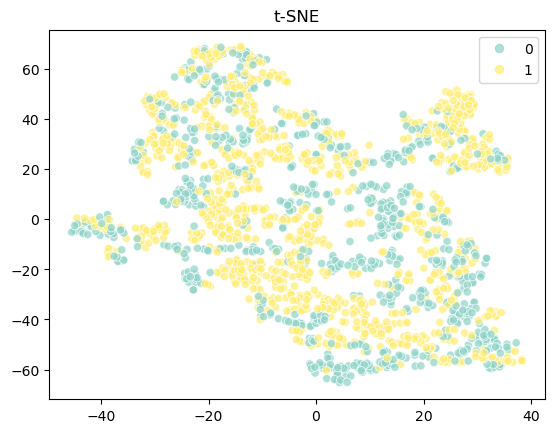

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

y_train_bin = [i[0] for i in y_train_bin]
classes = ['0', '1']
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_bin, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("t-SNE")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        tsne = TSNE(n_components=i)
        X_train_tsne = tsne.fit_transform(X_train)
        X_test_tsne = tsne.fit_transform(X_test)

        X_train_scale = scaler.fit_transform(X_train_tsne)
        y_train_scale = scaler.fit_transform(y_train_bin)
        X_test_scale = scaler.fit_transform(X_test_tsne)
        y_test_scale = scaler.fit_transform(y_test_bin)

        clf = KNeighborsClassifier(leaf_size=30, n_neighbors=32).fit(X_train_scale,y_train_scale)
        y_pred = clf.predict(X_test_scale)
        acc.append(metrics.accuracy_score(y_test_scale, y_pred))
        print (X_train_tsne.shape), print('Accuracy %s' % accuracy_score(y_test_scale, y_pred)), print(classification_report(y_test_scale, y_pred))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

(1828, 1)
Accuracy 0.5128205128205128
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       360
           1       0.43      0.34      0.38       264

   micro avg       0.53      0.51      0.52       624
   macro avg       0.51      0.49      0.50       624
weighted avg       0.52      0.51      0.51       624
 samples avg       0.51      0.51      0.51       624

(1828, 2)
Accuracy 0.46634615384615385
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       360
           1       0.34      0.25      0.29       264

   micro avg       0.48      0.47      0.48       624
   macro avg       0.45      0.44      0.44       624
weighted avg       0.46      0.47      0.46       624
 samples avg       0.47      0.47      0.47       624

(1828, 3)
Accuracy 0.4310897435897436
              precision    recall  f1-score   support

           0       0.55      0.12      0.20       360
           1  

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

# Outlier Detection on Dimensionality Reduction

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Isolation Forest

In [ ]:
model = IsolationForest(random_state=47)

param_grid = {'n_estimators': [1000, 1500],
               'max_samples': [10],
               'contamination': ['auto', 0.0001, 0.0002],
               'bootstrap': [True],
               'n_jobs': [-1]}

grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", refit=True, cv=10, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.fit(X_train_pca, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'bootstrap': True, 'contamination': 'auto', 'max_samples': 10, 'n_estimators': 1000, 'n_jobs': -1}


In [ ]:
isol = IsolationForest(bootstrap=True,
                       contamination=0.05,
                       max_samples=600,
                       n_estimators=1000,
                       n_jobs=-1
                       )
isol.fit(X_train_pca)
outliers_isol = isol.predict(X_train_pca)
np.unique(outliers_isol, return_counts=True)

(array([-1,  1]), array([  92, 1736]))

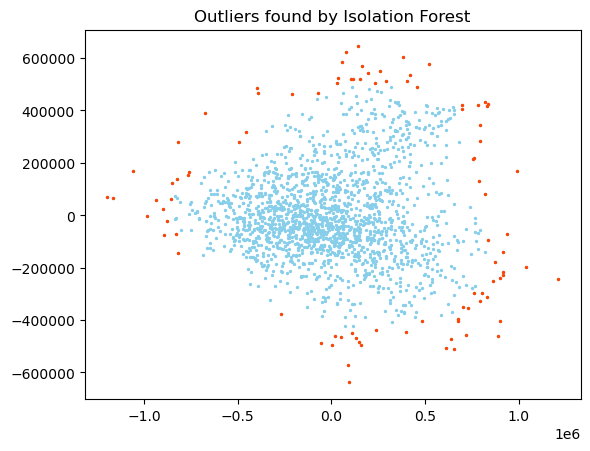

In [ ]:
anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train_pca[anomalies_isol]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='orangered', s=2)
plt.title("Outliers found by Isolation Forest")
plt.show()

## ABOD

In [ ]:
abd = ABOD()
abd.fit(X_train_pca)
outliers_abd = abd.predict(X_train_pca)
np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([1653,  175]))

In [ ]:
param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
              'n_neighbors': [5,6,7,8,9,10],
              'method': ["fast", "default"], }

abd_gridsearch=GridSearchCV(estimator=abd, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
best_model = grid_search.fit(X_train_pca, y_train)

In [ ]:
print(best_model.best_params_)

{'bootstrap': True, 'contamination': 'auto', 'max_samples': 10, 'n_estimators': 1000, 'n_jobs': -1}


In [ ]:
abd = ABOD(n_neighbors=7,
           contamination=.02
           )
abd.fit(X_train_pca)
outliers_abd = abd.predict(X_train_pca)
np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([1796,   32]))

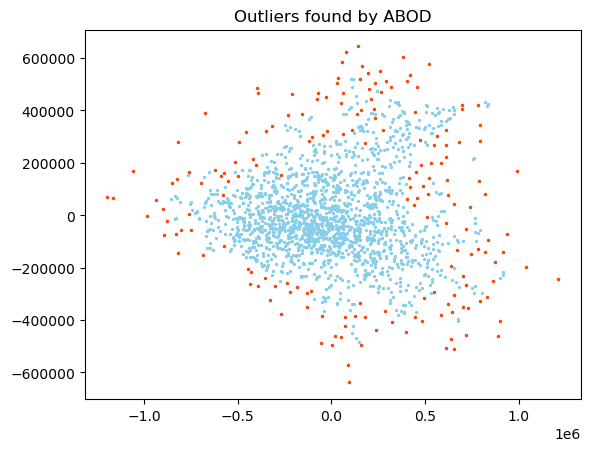

In [ ]:
anomalies_abd = where(outliers_abd==1)
anomalies_abd = X_train_pca[anomalies_abd]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_abd[:,0], anomalies_abd[:,1], color='orangered', s=2)
plt.title("Outliers found by ABOD")
plt.show()

## LOF

In [ ]:
lof = LocalOutlierFactor(n_neighbors=98,
                         contamination=.01,
                         algorithm='kd_tree',
                         )
outliers_lof = lof.fit_predict(X_train_pca)
np.unique(outliers_lof, return_counts=True)

(array([-1,  1]), array([  19, 1809]))

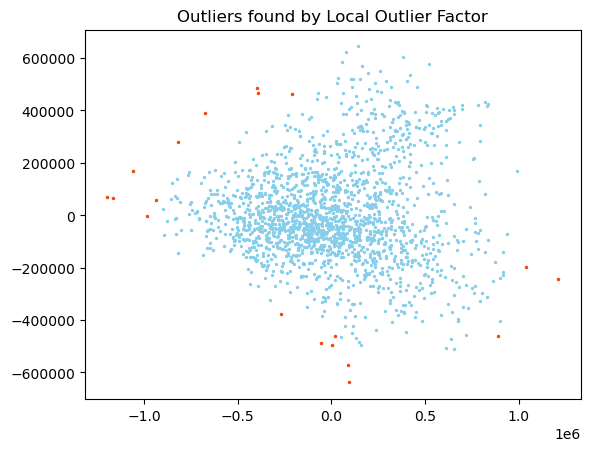

In [ ]:
anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train_pca[anomalies_lof]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='orangered', s=2)
plt.title("Outliers found by Local Outlier Factor")
plt.show()

## HBOS

In [ ]:
clf = HBOS()
clf.fit(X_train)

outliers_hbos = clf.predict(X_train)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([1645,  183]))

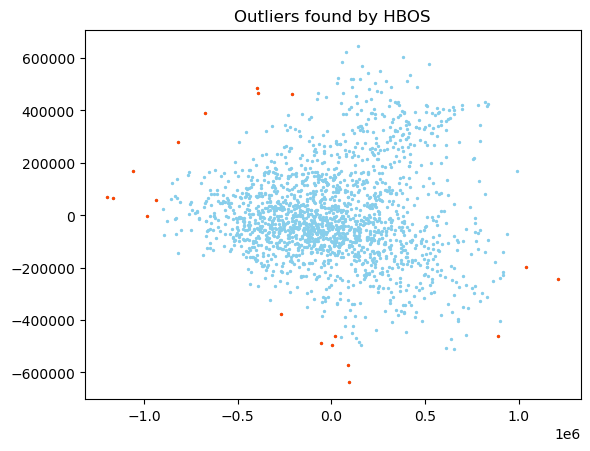

In [ ]:
anomalies_hbos = where(outliers_hbos==1)
anomalies_hbos = X_train_pca[anomalies_hbos]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='orangered', s=2)
plt.title("Outliers found by HBOS")
plt.show()

## Dealing with Outliers

In [ ]:
# outliers_final_dbscan = where(dbscan.labels_ == -1)
outliers_final_hbos = where(outliers_hbos == 1)
outliers_final_isol = where(outliers_isol == -1)
outliers_final_abd = where(outliers_abd == 1)
outliers_final_lof = where(outliers_lof == -1)

tot = []
for x in outliers_final_hbos:
    tot.extend(x)
for x in outliers_final_isol:
    tot.extend(x)
for x in outliers_final_abd:
    tot.extend(x)
for x in outliers_final_lof:
    tot.extend(x)
print(tot)

len(tot)

[32, 33, 34, 35, 42, 92, 93, 94, 95, 138, 194, 195, 196, 197, 198, 199, 225, 226, 240, 241, 242, 243, 248, 249, 250, 251, 280, 283, 284, 285, 286, 287, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 308, 309, 310, 311, 344, 346, 352, 391, 407, 449, 450, 451, 509, 510, 511, 536, 552, 553, 554, 555, 560, 561, 562, 563, 596, 599, 612, 613, 614, 615, 620, 621, 622, 623, 656, 657, 658, 659, 716, 717, 718, 719, 761, 771, 820, 821, 823, 864, 865, 866, 867, 908, 911, 952, 953, 954, 955, 968, 969, 970, 971, 987, 996, 997, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1036, 1037, 1073, 1074, 1075, 1177, 1179, 1185, 1187, 1236, 1237, 1239, 1244, 1245, 1246, 1247, 1280, 1282, 1283, 1384, 1385, 1386, 1387, 1444, 1445, 1550, 1594, 1600, 1601, 1602, 1603, 1654, 1697, 1699, 1702, 1703, 1704, 1705, 1706, 1707, 1741, 1743, 1748, 1749, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1762, 1766, 1800, 1801, 1802, 1803, 1819, 148, 149, 186, 188

469

In [ ]:
#I look for all the values that appear in the outliers list more than once and insert them into a list and then transform it into an array
listadoppi = []
import collections
for item, count in collections.Counter(tot).items():
    if count > 2:
        listadoppi.append(item)
print(listadoppi)
finale_out = np.array(listadoppi)

anomalies_final = X_train.iloc[finale_out]
print(len(anomalies_final))

[251, 292, 308, 1247, 1387, 1702, 1703, 1756, 1803, 1819, 288, 425, 481, 484, 897, 1204, 1383, 1420, 1422, 1423, 1505, 1506, 1816, 1817, 1818]
25


25


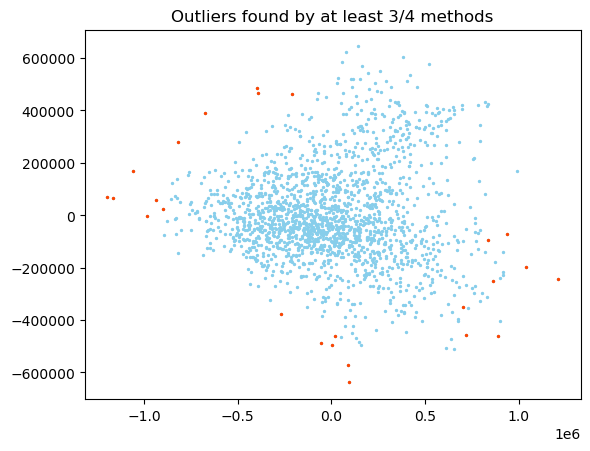

In [ ]:
anomalies_final = X_train_pca[finale_out]
print(len(anomalies_final))

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_final[:,0], anomalies_final[:,1], color='orangered', s=2)
plt.title("Outliers found by at least 3/4 methods")
plt.show()

### Removing Outliers

In [ ]:
df_wo_outliers = X_train.copy()
df_wo_outliers.drop(finale_out, inplace=True)
df_wo_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
frame_count,1803.0,1.943168e+05,28276.321424,140941.000000,171371.000000,1.889880e+05,214614.000000,304304.000000
sum,1803.0,4.660703e-02,9.319458,-151.120178,-0.344849,-3.552246e-02,0.202972,240.889893
mean,1803.0,2.136824e-07,0.000049,-0.000944,-0.000002,-2.030000e-07,0.000001,0.001223
std,1803.0,1.982854e-02,0.020289,0.000652,0.006489,1.346735e-02,0.025295,0.152168
min,1803.0,-1.620567e-01,0.173589,-0.998810,-0.199509,-1.002197e-01,-0.051636,-0.006134
...,...,...,...,...,...,...,...,...
stft_q75_w4,1803.0,8.430248e-01,0.075732,0.007891,0.812226,8.549987e-01,0.889274,0.986704
stft_q95_w4,1803.0,9.998189e-01,0.005074,0.839625,1.000000,1.000000e+00,1.000000,1.000000
stft_q99_w4,1803.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000
stft_kur_w4,1803.0,-5.643611e-01,0.767204,-1.644320,-1.009917,-7.473740e-01,-0.324401,7.127631


In [ ]:
y_train = y_train.ravel()

In [ ]:
X_train2 = df_wo_outliers.values
y_train2 = y_train

In [ ]:
type(y_train2)

numpy.ndarray

In [ ]:
y_train2 = np.delete(y_train2, finale_out)

In [ ]:
y_train2 = lb.fit_transform(y_train2)

In [ ]:
pca = PCA(n_components=2)
X_train_pca2 = pca.fit_transform(X_train2)
X_train_pca2.shape

(1803, 2)

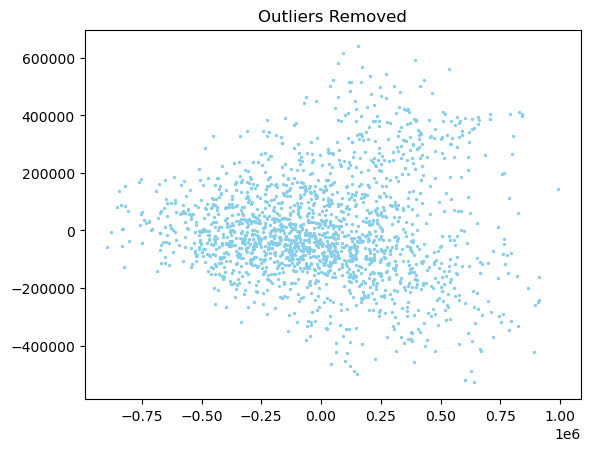

In [ ]:
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], color='skyblue', s=2)
plt.title("Outliers Removed")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9134615384615384
F1-score [0.90181818 0.9226361 ]
              precision    recall  f1-score   support

        song     0.8671    0.9394    0.9018       264
      speech     0.9527    0.8944    0.9226       360

    accuracy                         0.9135       624
   macro avg     0.9099    0.9169    0.9122       624
weighted avg     0.9165    0.9135    0.9138       624



In [ ]:
X_train_scale = scaler.fit_transform(X_train2)
y_train_scale = scaler.fit_transform(y_train2)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scale, y_train_scale)
y_pred = knn.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred, digits=4))

Accuracy 0.9551282051282052
F1-score [0.96045198 0.94814815]
              precision    recall  f1-score   support

           0     0.9770    0.9444    0.9605       360
           1     0.9275    0.9697    0.9481       264

   micro avg     0.9551    0.9551    0.9551       624
   macro avg     0.9523    0.9571    0.9543       624
weighted avg     0.9561    0.9551    0.9552       624
 samples avg     0.9551    0.9551    0.9551       624



### Transforming Outliers

In [ ]:
df_outliers_mean = X_train.copy()
df_outliers_mean.drop(finale_out, inplace=True)

means=[] #contiene le medie di tutte le 561 features del dataset SENZA outliers
for col in df_outliers_mean.columns:
    means.append(df_outliers_mean[col].mean())
len(df_outliers_mean)

1803

In [ ]:
for i in finale_out: # crea una riga in più per ogni outliers e ci inserisco means in tutte le featuers
    df_outliers_mean.loc[i] = means

df_outliers_mean.info()  # a questo punto sono stati reinseriti gli outliers con le medie "pulite" del train
# infatti nella cella prima sono 81 in meno, ora di nuovo 7352

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1818
Columns: 425 entries, frame_count to stft_skew_w4
dtypes: float64(425)
memory usage: 5.9 MB


In [ ]:
df_outliers_mean = df_outliers_mean.sort_index()
df_outliers_mean.describe().T

,count,mean,std,min,25%,50%,75%,max
frame_count,1828.0,1.943168e+05,28082.193621,140941.000000,171372.000000,1.889890e+05,2.130130e+05,304304.000000
sum,1828.0,4.660703e-02,9.255476,-151.120178,-0.330673,-3.056335e-02,1.965256e-01,240.889893
mean,1828.0,2.136824e-07,0.000049,-0.000944,-0.000002,-1.605000e-07,9.977500e-07,0.001223
std,1828.0,1.982854e-02,0.020150,0.000652,0.006617,1.368516e-02,2.487183e-02,0.152168
min,1828.0,-1.620567e-01,0.172397,-0.998810,-0.197296,-1.015167e-01,-5.258942e-02,-0.006134
...,...,...,...,...,...,...,...,...
stft_q75_w4,1828.0,8.430248e-01,0.075213,0.007891,0.812659,8.541100e-01,8.887210e-01,0.986704
stft_q95_w4,1828.0,9.998189e-01,0.005039,0.839625,1.000000,1.000000e+00,1.000000e+00,1.000000
stft_q99_w4,1828.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000
stft_kur_w4,1828.0,-5.643611e-01,0.761936,-1.644320,-1.006441,-7.369594e-01,-3.283854e-01,7.127631


In [ ]:
X_train3 = df_outliers_mean.values
y_train3 = y_train

In [ ]:
y_train3 = lb.fit_transform(y_train3)

In [ ]:
X_train_scale = scaler.fit_transform(X_train3)
y_train_scale = scaler.fit_transform(y_train3)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scale, y_train_scale)
y_pred = knn.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred, digits=4))

Accuracy 0.9551282051282052
F1-score [0.96045198 0.94814815]
              precision    recall  f1-score   support

           0     0.9770    0.9444    0.9605       360
           1     0.9275    0.9697    0.9481       264

   micro avg     0.9551    0.9551    0.9551       624
   macro avg     0.9523    0.9571    0.9543       624
weighted avg     0.9561    0.9551    0.9552       624
 samples avg     0.9551    0.9551    0.9551       624



In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_scale, y_train_scale)
y_pred = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred, digits=4))

Accuracy 0.8108974358974359
F1-score [0.84832905 0.74893617]
              precision    recall  f1-score   support

           0     0.7895    0.9167    0.8483       360
           1     0.8544    0.6667    0.7489       264

   micro avg     0.8109    0.8109    0.8109       624
   macro avg     0.8219    0.7917    0.7986       624
weighted avg     0.8169    0.8109    0.8063       624
 samples avg     0.8109    0.8109    0.8109       624

